## Problem statement :

Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

### Load and check data

In [2]:
data = pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Explore the data

In [3]:
data.shape

(101, 18)

In [4]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [5]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
data.duplicated().sum()

0

## Data PreProcessing

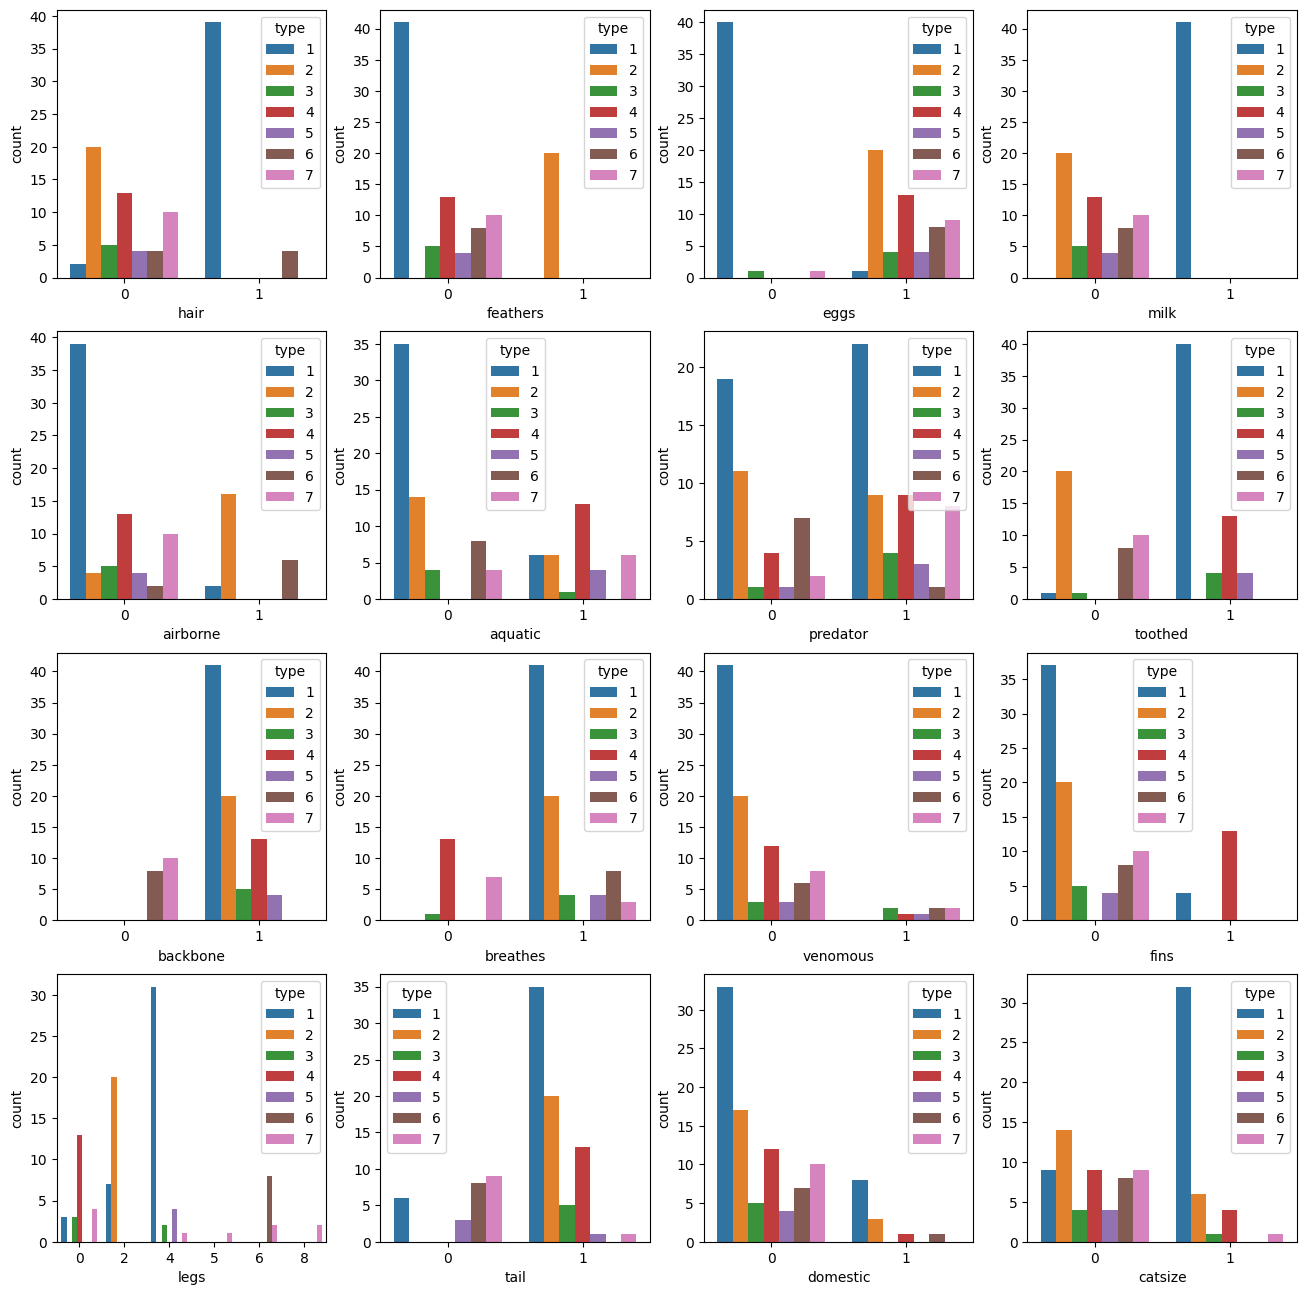

In [7]:
columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
figs, axes = plt.subplots(nrows=4,ncols=4,figsize=(16,16))
for i in range(len(columns)):
    sns.countplot(data=data, hue='type',x=columns[i], ax=axes[i//4,i%4])

<AxesSubplot: >

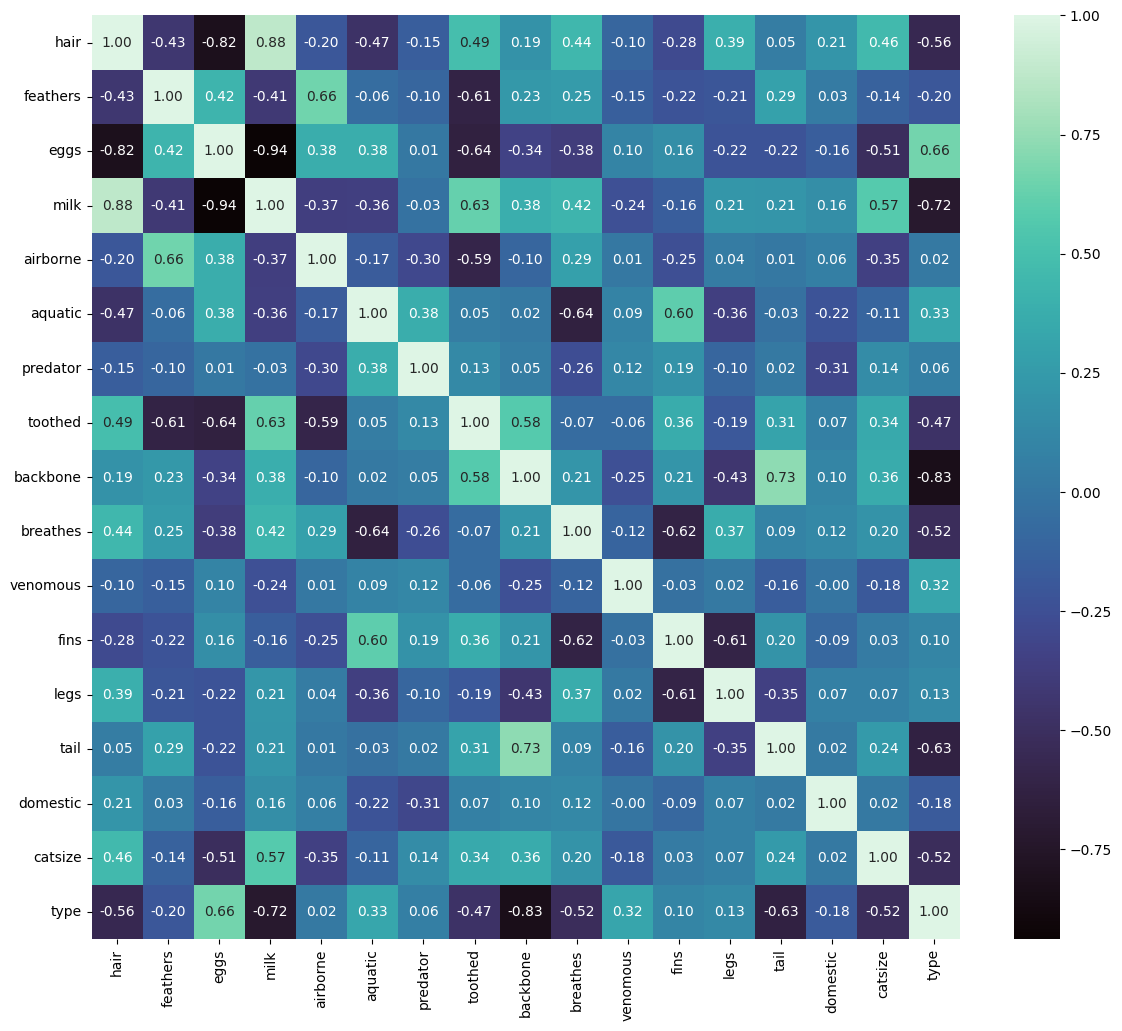

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(data=data.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='mako')

Data preprocess for data

In [9]:
x = data.drop(['type','animal name'],axis=1)
y = data['type']

In [10]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

### Use GridSearchCV for getting the best parameters

In [ ]:
param_grid = {'n_neighbors':range(1,20),
              'weights':['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [20, 30, 40],
              'p': [1, 2],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

In [ ]:
knc = KNeighborsClassifier()
grid = GridSearchCV(estimator=knc, param_grid=param_grid, cv=4)
grid.fit(x,y)

In [ ]:
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

### Building model with best parameters

In [ ]:
model = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
model.fit(x_train,y_train)

predict and find accuracy on test data 

In [ ]:
y_pred = model.predict(x_test)
np.mean(y_pred==y_test)*100